#  Classification avec des images réelles: dogs vs cats


Le dataset complet provient d'une compétition Kaggle: https://www.kaggle.com/c/dogs-vs-cats

Le dataset en question contient 2 folders: dogs - cats

Soit un total de 2000 images.

L'objectif est de capitaliser sur les notions du cours pour développer un réseau CNN qui arrive à prédire avec la meilleure performance possible les images de chiens et de chats.

Ce notebook va permettre de structurer l'approche et la construction du modèle. Si vous avez des idées additionnelles pour améliorer la performance, ne pas hésiter à les implémenter.

## 1- Importer des librairies pertinentes:

In [1]:
import numpy as np 
import pandas as pd 
import scipy
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
from matplotlib.image import imread
import tensorflow as tf 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
# utiliser la GPU au lieu du CPU 
%matplotlib inline 

## 2- Localiser le path où se trouvent toutes les images

In [2]:
os.listdir('../input/image-classification-project-resnet-keras/data_cats_and_dogs')

['validation', 'train']

In [3]:
# Define a variable as the directory path
my_data_dir = '../input/image-classification-project-resnet-keras/data_cats_and_dogs'

### 2.1 - Vérifier que la commande ci-dessous retourne ['train', 'validation']

In [4]:
os.listdir(my_data_dir)

['validation', 'train']

### 2.2 - Définir les variables train_path et val_path:

In [5]:
# train and test paths (\ for windows, / for mac)
train_path = my_data_dir+"/train"
test_path =  my_data_dir+"/validation"

In [6]:
os.listdir(train_path)

['dogs', 'cats']

### 2.3 - Print le nombre d'images pour chaque class (cats & dogs) dans le dossier train et validation:

In [7]:
# Vérifier le nombre d'images de chaque classe pour le train_path et val_path
print('train images')
nb_cats=len(os.listdir(train_path+'/cats'))
print(f"numbers of cats images: {nb_cats}")
nb_dogs=len(os.listdir(train_path+'/dogs'))
print(f"numbers of cats images: {nb_dogs}")
# Vérifier que vous avez bien 2000 images au total !

train images
numbers of cats images: 1000
numbers of cats images: 1000


In [8]:
# Vérifier le nombre d'images de chaque classe pour le train_path et val_path
print('train images')
nb_cats=len(os.listdir(test_path+'/cats'))
print(f"numbers of cats images: {nb_cats}")
nb_dogs=len(os.listdir(test_path+'/dogs'))
print(f"numbers of cats images: {nb_dogs}")
# Vérifier que vous avez bien 1000 images au total !

train images
numbers of cats images: 500
numbers of cats images: 500


## 3) Analyse d'exemples d'images dogs and cats

### 3.1 - Choisir au hasard une image de dog dans le train_path

In [9]:
dog_path = test_path+'/dogs' +"/"+os.listdir(test_path+'/dogs')[97]
dog_path

'../input/image-classification-project-resnet-keras/data_cats_and_dogs/validation/dogs/dog.2092.jpg'

### 3.2 - Transformer cette image en numpy array

In [10]:
dog_array = imread(dog_path)
dog_array

array([[[ 1,  0,  6],
        [ 1,  0,  6],
        [ 1,  0,  6],
        ...,
        [ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  7]],

       [[ 1,  0,  6],
        [ 1,  0,  6],
        [ 1,  0,  6],
        ...,
        [ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  7]],

       [[ 1,  0,  6],
        [ 1,  0,  6],
        [ 1,  0,  6],
        ...,
        [ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  7]],

       ...,

       [[10, 11, 16],
        [10, 11, 16],
        [10, 11, 16],
        ...,
        [ 5,  6,  8],
        [ 5,  6,  8],
        [ 5,  6,  8]],

       [[ 7,  8, 13],
        [ 8,  9, 14],
        [ 9, 10, 15],
        ...,
        [ 6,  7,  9],
        [ 6,  7,  9],
        [ 6,  7,  9]],

       [[ 6,  7, 12],
        [ 9, 10, 15],
        [12, 13, 18],
        ...,
        [ 5,  6,  8],
        [ 5,  6,  8],
        [ 5,  6,  8]]], dtype=uint8)

### 3.3 - Vérifier les dimensions de cette image

In [11]:
dog_array.shape

(473, 499, 3)

### 3.4 -Plot cette image via 'imshow'

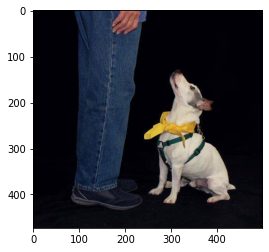

In [12]:
plt.imshow(dog_array)

### 3.5 - Refaire le même travail avec l'image d'un cat depuis le dossier train 

In [13]:
cat_path = test_path+'/cats' +"/"+os.listdir(test_path+'/cats')[97]
cat_path

'../input/image-classification-project-resnet-keras/data_cats_and_dogs/validation/cats/cat.2361.jpg'

In [14]:
cat_array = imread(cat_path)
cat_array

array([[[ 64,  66,  44],
        [ 61,  63,  41],
        [ 55,  57,  35],
        ...,
        [ 75,  67,  46],
        [ 74,  66,  45],
        [ 70,  73,  44]],

       [[ 21,  20,   0],
        [ 20,  19,   0],
        [ 19,  18,   0],
        ...,
        [ 57,  50,  31],
        [ 56,  49,  30],
        [ 46,  49,  22]],

       [[ 19,  18,   0],
        [ 18,  17,   0],
        [ 17,  16,   0],
        ...,
        [ 65,  60,  40],
        [ 64,  59,  39],
        [ 54,  56,  32]],

       ...,

       [[156, 163, 171],
        [148, 155, 163],
        [147, 154, 162],
        ...,
        [158, 167, 174],
        [157, 166, 173],
        [148, 163, 170]],

       [[134, 150, 165],
        [137, 150, 166],
        [131, 145, 158],
        ...,
        [159, 169, 179],
        [157, 167, 177],
        [155, 165, 177]],

       [[137, 153, 168],
        [139, 152, 168],
        [133, 147, 160],
        ...,
        [159, 169, 179],
        [157, 167, 177],
        [157, 167, 179]]

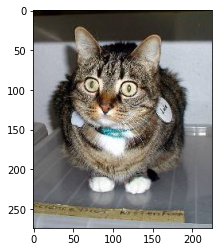

In [15]:
plt.imshow(cat_array)

In [16]:
cat_array.shape

(274, 225, 3)

## 4) Créer un ImageDataGenerator qui effectue un retraitement "pertinent" de ces images:

In [17]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [18]:
#https://www.section.io/engineering-education/image-preprocessing-in-python/
image_generator = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_generator=ImageDataGenerator()
#width_shift_range=[-400,400], featurewise_center =True, featurewise_std_normalization = True , horizontal_flip=True

In [19]:
image_generator.flow_from_directory(train_path)

Found 2000 images belonging to 2 classes.


In [20]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/cats'):
    im_path=train_path+'/cats' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)    
for image_filename in os.listdir(train_path+'/dogs'):
    im_path=train_path+'/dogs' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
print("training Images")
print(np.mean(dim1))
print(np.mean(dim2))

training Images
358.9175
403.9725


In [21]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/cats'):
    im_path=test_path+'/cats' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)    
for image_filename in os.listdir(test_path+'/dogs'):
    im_path=test_path+'/dogs' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
print("test Images")
print(np.mean(dim1))
print(np.mean(dim2))

test Images
362.751
409.041


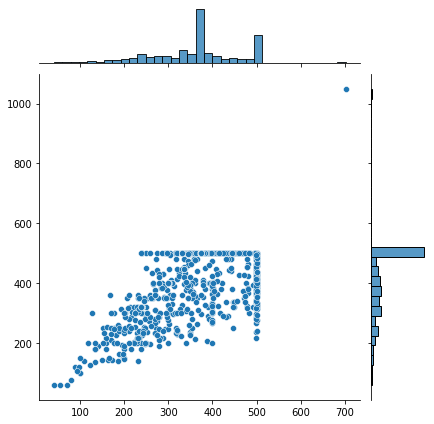

In [22]:
sns.jointplot(dim1,dim2)

## 5) Construire un modèle CNN pour la classification binaire de ces images:



In [23]:
# import the model and useful layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import ResNet50V2 ,ResNet50
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D ,Dropout
from tensorflow.keras.layers import Add ,PReLU,Input,Dense , Conv2D ,MaxPool2D,Flatten ,Dropout, UpSampling2D ,MaxPooling2D ,Activation ,BatchNormalization ,Conv1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD ,Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate ,GlobalAveragePooling2D , Reshape
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.initializers import glorot_uniform 


### 5.1 Modèle CNN  sous architecture Resnet (Residual Networks)

### 5.1.1 Identity Block 

In [24]:
def identity_block(X,f,filters,stage,block):
    conv_name_base='res'+str(stage)+block+'_branch' # nom de la convolution
    bn_name_base='bn'+str(stage)+block+'_branch' # nom de la Batchnormalization 
    F1,F2,F3=filters
    X_shortcut= X
    
    X= Conv2D(filters=F1,kernel_size=(1,1), strides=(1,1) , padding='valid', name=conv_name_base+"2a",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2a")(X) 
    X=Activation('relu')(X)
    
    X= Conv2D(filters=F2,kernel_size=(f,f), strides=(1,1) , padding='same', name=conv_name_base+"2b",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2b")(X) 
    X=Activation('relu')(X)
    
    X= Conv2D(filters=F3,kernel_size=(1,1), strides=(1,1) , padding='valid', name=conv_name_base+"2c",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2c")(X) 
    
    X=Add()([X,X_shortcut])# skip connection 
    X=Activation('relu')(X)
    
    return X
    

### 5.1.2 Convolutional  Block 

In [25]:
def convolutional_block(X,f,filters,stage,block,s=2): 
    conv_name_base='res'+str(stage)+block+'_branch' # nom de la convolution
    bn_name_base='bn'+str(stage)+block+'_branch' # nom de la Batchnormalization 
    F1,F2,F3=filters
    X_shortcut= X
    
    X= Conv2D(filters=F1,kernel_size=(1,1), strides=(s,s) , padding='valid', name=conv_name_base+"2a",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2a")(X) 
    X=Activation('relu')(X)
    
    
    X= Conv2D(filters=F2,kernel_size=(f,f), strides=(1,1) , padding='same', name=conv_name_base+"2b",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2b")(X) 
    X=Activation('relu')(X)
  
    X= Conv2D(filters=F3,kernel_size=(1,1), strides=(1,1) , padding='valid', name=conv_name_base+"2c",kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name=bn_name_base+"2c")(X) 
      
    
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=42))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X
    
    

### 5.1.3 Resnet Model

In [26]:
def ResNet50M(input_shape):
    X_input=Input(input_shape)
    
    X=ZeroPadding2D((3,3))(X_input)
    X= Conv2D(64,kernel_size=(7,7), strides=(2,2) , padding='valid', name='conv1',kernel_initializer=glorot_uniform(seed=42))(X) 
    X= BatchNormalization(axis=3,name="bn_conv1")(X) 
    X=Activation('relu')(X)
    X=MaxPooling2D((3,3),strides=(2,2))(X)
    
    X=convolutional_block(X,f=3,filters=[64,64,256],stage=2,block="a",s=2)
    X=identity_block(X,3,filters=[64,64,256],stage=2,block="b")
    X=identity_block(X,3,filters=[64,64,256],stage=2,block="c")
    
    X=convolutional_block(X,f=3,filters=[128,128,512],stage=3,block="a",s=2)
    X=identity_block(X,3,[128,128,512],stage=3,block="b")
    X=identity_block(X,3,[128,128,512],stage=3,block="c")
    X=identity_block(X,3,[128,128,512],stage=3,block="d")
    
    X=convolutional_block(X,f=3,filters=[256,256,1024],stage=4,block="a",s=2)
    X=identity_block(X,3,[256,256,1024],stage=4,block="b")
    X=identity_block(X,3,[256,256,1024],stage=4,block="c")
    X=identity_block(X,3,[256,256,1024],stage=4,block="d")
    X=identity_block(X,3,[256,256,1024],stage=4,block="e")
    X=identity_block(X,3,[256,256,1024],stage=4,block="f")
    
    X=convolutional_block(X,f=3,filters=[512,512,2048],stage=5,block="a",s=2)
    X=identity_block(X,3,[512,512,2048],stage=5,block="b")
    X=identity_block(X,3,[512,512,2048],stage=5,block="c")
    
    X=AveragePooling2D(pool_size=(2,2),padding="same")(X)
    X=Model(inputs=X_input,outputs=X,name="ResNet50")
    
    return X
    

In [27]:
image_shape=(360,410,3)

In [28]:
base_model=ResNet50M(image_shape)

2022-08-19 14:19:31.769901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 14:19:31.875510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 14:19:31.876294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 14:19:31.878252: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [29]:
base_model.output.shape

TensorShape([None, 3, 4, 2048])

In [30]:
 pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [31]:
base_model.load_weights("../input/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
print(base_model.summary())

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 360, 410, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 366, 416, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 180, 205, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 180, 205, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [34]:
from tensorflow.keras.constraints import max_norm 
head_model=base_model.output
head_model=Flatten()(head_model)
head_model=Dense(256,activation='relu',name="fc1",kernel_constraint=max_norm(2.),kernel_initializer=glorot_uniform(seed=42))(head_model)
head_model=Dense(128,activation='relu',name="fc2",kernel_constraint=max_norm(2.),kernel_initializer=glorot_uniform(seed=42))(head_model)
head_model=Dense(64,activation='relu',kernel_constraint=max_norm(2.),name="fc2_bis",kernel_initializer=glorot_uniform(seed=42))(head_model)
head_model=Dense(32,activation='relu',kernel_constraint=max_norm(2.),name="fc2_bis1",kernel_initializer=glorot_uniform(seed=42))(head_model)
head_model=Dense(1,activation='sigmoid',kernel_constraint=max_norm(2.),name="fc3",kernel_initializer=glorot_uniform(seed=42))(head_model)

In [35]:
mc = ModelCheckpoint('/kaggle/working/best_model.h5', monitor='val_accuracy',save_best_only=True, mode="max")

In [36]:
model=Model(inputs=base_model.input,outputs=head_model)

### 5.2 Créer une instance de EarlyStopping

In [37]:
early_stop=EarlyStopping(monitor='val_accuracy',verbose=1,patience=40,mode="max")

### 5.3 Créer un generator pour le train et validation set: 

In [38]:
image_shape

(360, 410, 3)

In [39]:
# Create the train_image_generator
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(360,410),
                                                            color_mode='rgb',
                                                            class_mode='binary',
                                                            batch_size=32,
                                                            shuffle=True)

Found 2000 images belonging to 2 classes.


In [40]:
# Create the validation_image_generator64
val_image_generator = test_generator.flow_from_directory(test_path,target_size=(360,410),
                                                          color_mode='rgb',
                                                          class_mode='binary',
                                                           batch_size=32,
                                                          shuffle=False)

Found 1000 images belonging to 2 classes.


In [41]:
# verify the classes dictionary (1 is dog or cat ?)
print(val_image_generator.class_indices)
print(train_image_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


### 5.3 Entrainer le modèle à partir du train_image_generator et utiliser le EarlyStopping

In [42]:
# Ce code est compilé qu'aprés avoir fait le model.fit_generator au moins une seul fois , il contient l'enregistrement des poids de la  meilleur epoche d'entrainement 
#model.load_weights("/kaggle/working/best_model.h5")

In [43]:
#https://www.jeremyjordan.me/nn-learning-rate/
opt =keras.optimizers.SGD(lr=0.001
                          , decay=1e-6, momentum=0.9, nesterov=True)
#keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',  optimizer=opt, metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [44]:
#https://towardsdatascience.com/a-bunch-of-tips-and-tricks-for-training-deep-neural-networks-3ca24c31ddc8
reduce = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=30, mode='auto')

In [45]:
# Modèle entrainé a maintes reprises en insérant a chaque fitting les derniers poids de la meilleure epoche best_model.h5
model.fit(train_image_generator,validation_data=val_image_generator,epochs=100,verbose=1,callbacks=[mc ,early_stop,reduce],steps_per_epoch=len(train_image_generator))

2022-08-19 14:19:49.957811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-08-19 14:19:55.542153: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


63/63 [==============================] - 88s 1s/step - loss: 0.4042 - accuracy: 0.8045 - val_loss: 0.2185 - val_accuracy: 0.9130


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
63/63 [==============================] - 78s 1s/step - loss: 0.2566 - accuracy: 0.8845 - val_loss: 0.1708 - val_accuracy: 0.9360
Epoch 3/100
63/63 [==============================] - 78s 1s/step - loss: 0.2306 - accuracy: 0.8965 - val_loss: 0.1771 - val_accuracy: 0.9180
Epoch 4/100
63/63 [==============================] - 80s 1s/step - loss: 0.2138 - accuracy: 0.9115 - val_loss: 0.1932 - val_accuracy: 0.9160
Epoch 5/100
63/63 [==============================] - 78s 1s/step - loss: 0.1998 - accuracy: 0.9195 - val_loss: 0.1274 - val_accuracy: 0.9490
Epoch 6/100
63/63 [==============================] - 78s 1s/step - loss: 0.1930 - accuracy: 0.9165 - val_loss: 0.1549 - val_accuracy: 0.9400
Epoch 7/100
63/63 [==============================] - 79s 1s/step - loss: 0.1932 - accuracy: 0.9190 - val_loss: 0.1472 - val_accuracy: 0.9490
Epoch 8/100
63/63 [==============================] - 77s 1s/step - loss: 0.1720 - accuracy: 0.9270 - val_loss: 0.1524 - val_accuracy: 0.9390
Epoch 9/100
6

In [46]:
# charger le best model weights entrainé 
model.load_weights("/kaggle/working/best_model.h5")

In [47]:
model.evaluate_generator(val_image_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1213703379034996, 0.9580000042915344]

In [48]:
model.evaluate_generator(train_image_generator)

[0.08922237902879715, 0.9614999890327454]

In [49]:
model.save("/kaggle/working//model")

2022-08-19 16:09:51.103607: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# 6) Prédictions sur des images cats and dogs 

In [50]:
from tensorflow.keras.models import load_model

In [51]:
from PIL import Image
import requests
from io import BytesIO
import json 

In [52]:
def predict_(image_path):
    model1=load_model("/kaggle/working/model")
    #Charger les poids du meilleure modèle 
    model1.load_weights('../input/resnet-50-pretrained/best_model.h5')
    # compiler le modèle 
    opt =keras.optimizers.SGD(lr=0.001
                          , decay=1e-6, momentum=0.9, nesterov=True)
    model1.compile(loss='binary_crossentropy',  optimizer=opt, metrics=['accuracy'])
    # Charger l'image à classifier
    image=imread(image_path)
    plt.imshow(image)
    image_to_pred=tf.keras.utils.load_img(image_path,target_size = (360, 410))
    print(image_to_pred)
    image_to_pred = np.expand_dims(image_to_pred, axis = 0)
    #predire l'image :
    preds=model1.predict( image_to_pred)[0][0]
    if preds<0.5:
        print("Predicted Label:Cat")
    else:
        print("Predicted Label: Dog")
    image=imread(image_path)
    plt.imshow(image)


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


<PIL.Image.Image image mode=RGB size=410x360 at 0x7F1E99BC2AD0>
Predicted Label:Cat


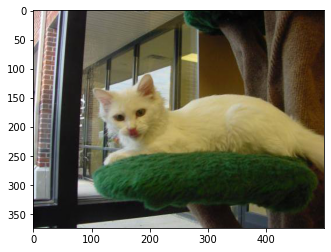

In [53]:
predict_(train_path+"/cats/cat.891.jpg")

## 8) Evaluation du modèle

In [54]:
from tensorflow.keras import losses

### 8.2 Plot le training et validation loss 

In [55]:
losses = pd.DataFrame(model.history.history)

### 8.3 Calculer les probabilités pour le validation image generator 

In [56]:
y_pred_proba  = model.predict_generator(val_image_generator)
#y_pred_proba

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


### 8.4 Transformer ces probabilités en classes en prenant un threshold de 0.5

In [57]:
y_pred_class = y_pred_proba > 0.5

### 8.5 Récupérer le vecteur des true labels à partir du validation image generator

In [58]:
y_test = val_image_generator.classes

### 8.6 Afficher le classification report et la matrice de confusion

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_pred_class,y_test))
print(classification_report(y_pred_class,y_test))


[[478  20]
 [ 22 480]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       498
        True       0.96      0.96      0.96       502

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



### 8.7 KPI final: quel est l'accuracy du model sur les données de test ? Etes-vous satisfaits de la performance de votre modèle ?

### https://teachablemachine.withgoogle.com/
## 97% est une trés bonne performance de notre modèle , le modèle teachable machine de google donne sur nos image 95%

# 9) Prédictions sur des cas particuliers (optionnel)

### 9.1 Afficher quelques images des données de test où le modèle s'est trompé.

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


<PIL.Image.Image image mode=RGB size=410x360 at 0x7F1E994AF450>
Predicted Label: Dog


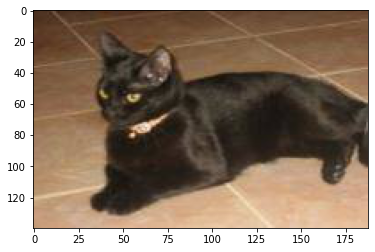

<PIL.Image.Image image mode=RGB size=410x360 at 0x7F1E98EA4910>
Predicted Label:Cat


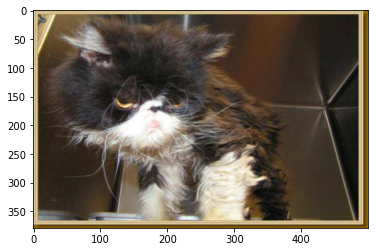

<PIL.Image.Image image mode=RGB size=410x360 at 0x7F2281002F50>
Predicted Label:Cat


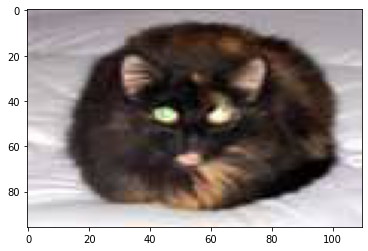

<PIL.Image.Image image mode=RGB size=410x360 at 0x7F228104FED0>
Predicted Label: Dog


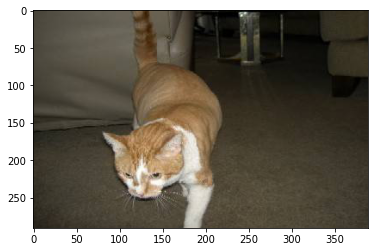

<PIL.Image.Image image mode=RGB size=410x360 at 0x7F1E96544C90>
Predicted Label: Dog


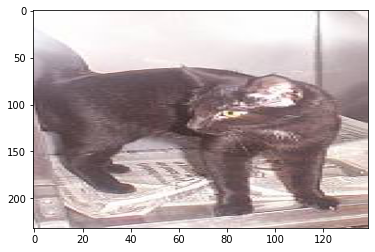

In [60]:
indices = [i for i,v in enumerate(y_pred_class) if y_pred_class[i]!=y_test[i]]    
for i in indices[5:10]:
    path=my_data_dir+"/"+"validation"+"/"+val_image_generator.filenames[i]
    predict_(path)
    img = plt.imread(path)

    plt.imshow(img, aspect='auto')
    plt.show()

In [61]:
dim1_er=[]
dim2_er=[]
for i in indices:
    path=my_data_dir+"/"+"validation"+"/"+val_image_generator.filenames[i]
    img = imread(path)
    d1,d2,color= img.shape
    dim1_er.append(d1)
    dim2_er.append(d2)
subset_of_wrongly_predicted = [val_image_generator.filenames[i] for i in indices ]

In [62]:
df=pd.DataFrame()
df['image Name']=subset_of_wrongly_predicted
df['dim1']=dim1_er
df['dim2']=dim2_er
df

,image Name,dim1,dim2
0,cats/cat.2010.jpg,374,499
1,cats/cat.2038.jpg,375,499
2,cats/cat.2049.jpg,213,319
3,cats/cat.2061.jpg,375,499
4,cats/cat.2077.jpg,315,499
5,cats/cat.2083.jpg,140,188
6,cats/cat.2106.jpg,379,500
7,cats/cat.2165.jpg,96,110
8,cats/cat.2186.jpg,291,389
9,cats/cat.2189.jpg,232,139


In [63]:
for image_filename in os.listdir(test_path+'/cats'):
    im_path=test_path+'/cats' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)    
for image_filename in os.listdir(test_path+'/dogs'):
    im_path=test_path+'/dogs' +"/"+image_filename
    img = imread(im_path)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

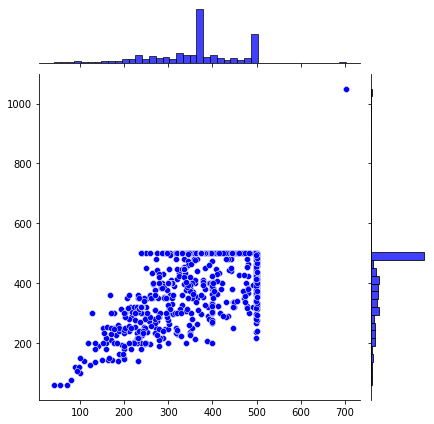

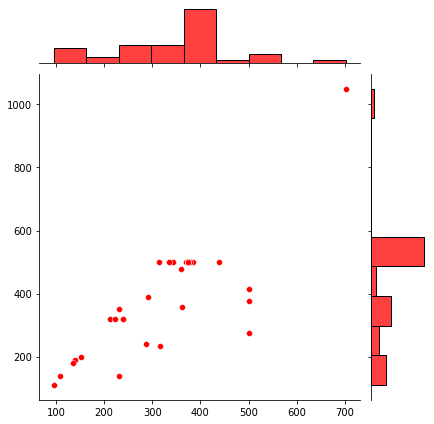

In [64]:
# jointplot des dimensions de toutes les images 
sns.jointplot(dim1,dim2,color='blue')
# jointplot des dimensions de toutes les images mal prédites 
sns.jointplot(dim1_er,dim2_er,color='red')

### 9.2 Ces images ont-elles des patterns en commun ?

- Images mal prédites sont du a la déformation de l'image lorsque qu'on essaye d'unifier le shape de l'image pour notre modele CNN  (outlier de point de vue shape )

- certaines images contiennent d'autres patterns : d'autres animaux  , hommmes grillage 

- certains chiens petit d'âge resemblent a des chats 

# Fin du projet!